# Adults Income
Sources:

- https://www.kaggle.com/datasets/wenruliu/adult-income-dataset. 

- http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html . 

An annual income results to various factors, some of them are the education level, the age, the gender, the race and etc. We decided to visualize demographic factors on that time that afected on the anual income on that time and visualize them to determine if there are notable differences to influence on the income or not. After getting the data I had some questions:

- Does the age matters? Should we expect more anual income after 35 year old?
- Does the educational level influence the age rate getting more income?
- Does the educational level matters? How big are the differences between the income on different educational levels?
- Does race matters? On the 90's (1994), How spread out the income was for the different races?
- Last but nor least, It is known that in the 90's (1994) the salary gap was important between genders, is this true? does it really matters?
### Conditions 
We have to note that the Data was taken from a census made on USA on 1994 and they took some conditions of the people to make the data more practic. There are the conditions they made bellow:

##### ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)):
- Individual Age > 16.
- Individual's adjusted gross income > 100.
- An individual's final weight (AFNLWGT)>1. 
- Individual's hours worked per week >1.

They used 14 columns on the dataset, but today, our target will be on 5 of them:
- ###### 'income', 'age', 'education', 'race', 'gender'


In [638]:
import io
import gzip
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [526]:
df = pd.read_csv('/Users/ez/Desktop/Bootcamp/adult.csv')

In [527]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [528]:
df=df.dropna()

In [529]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [530]:

df[df['workclass'] == '?']

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,?,299831,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K
22,72,?,132015,7th-8th,4,Divorced,?,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,?,191846,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
48812,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
48822,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [531]:
df.drop(df.index[(df["workclass"] == "?")],axis=0,inplace=True)

In [532]:
df[df['education'] == '10th']

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
38,17,Private,269430,10th,6,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
97,49,Private,164877,10th,6,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<=50K
105,36,Private,75826,10th,6,Separated,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
139,23,Private,306309,10th,6,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48786,33,Private,182401,10th,6,Never-married,Adm-clerical,Not-in-family,Black,Male,0,0,40,United-States,<=50K
48789,45,Private,155093,10th,6,Divorced,Other-service,Not-in-family,Black,Female,0,0,38,Dominican-Republic,<=50K
48796,66,Federal-gov,47358,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,3471,0,40,United-States,<=50K
48807,32,Private,211349,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K


In [533]:
df.drop(df.index[(df["occupation"] == "?")],axis=0,inplace=True)

In [534]:
df[df['occupation']== '?']

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


In [535]:
df[df['native-country']=='?']

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
19,40,Private,85019,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,?,>50K
65,41,Private,109912,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,40,?,<=50K
83,44,Self-emp-inc,223881,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,50,?,>50K
188,34,State-gov,513100,Bachelors,13,Married-spouse-absent,Farming-fishing,Not-in-family,Black,Male,0,0,40,?,<=50K
253,42,Federal-gov,177937,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,40,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48694,45,Private,199590,5th-6th,3,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,?,<=50K
48730,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
48750,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
48773,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K


In [536]:
df.drop(df.index[(df["native-country"] == "?")],axis=0,inplace=True)

In [537]:
df[df['native-country']=='?']

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


In [538]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [539]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [540]:
df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', '5th-6th',
       'Assoc-voc', '9th', 'Doctorate', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [541]:
uphighschool = ['Assoc-acdm', 'Some-college', 'Prof-school' , 'Bachelors', 'Assoc-voc', 'Doctorate']
lowhighschool= ['HS-grad','12th','11th', '10th' ,'9th','7th-8th', '5th-6th', '1st-4th', 'Preschool']
upHS = df[df['education'].isin(uphighschool)]
lowHS= df[df['education'].isin(lowhighschool)]

## Visualization

### Here we can begin to ask the questions described above.


#### - Does the age matters? Should we expect more anual income after 35 year old?


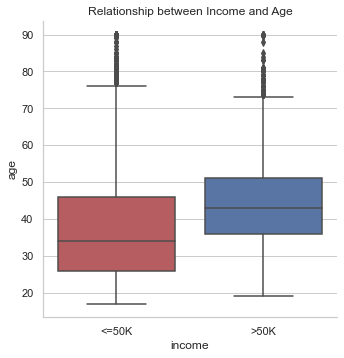

In [633]:
colors = {'<=50K': 'r', '>50K': 'b'}
sns.catplot(data=df,x='income', y='age', kind= 'box', aspect=1, palette= colors)
plt.title('Relationship between Income and Age')
plt.show()

##### From the above chart we can infer that:
- Most of the people having income less than or equal to 50K are between age 25-45.
- Most of the people having income more than 50K are between age 35-50.
- We can expect an income higher than 50K between age 40-45.

#### -Does the educational level influence the age rate getting more income?


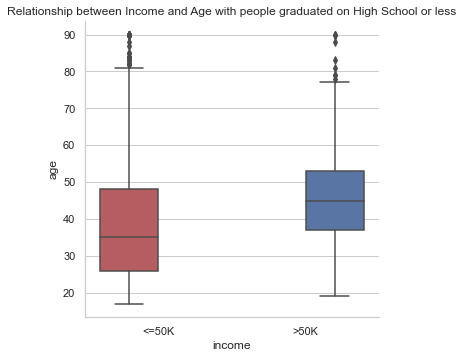

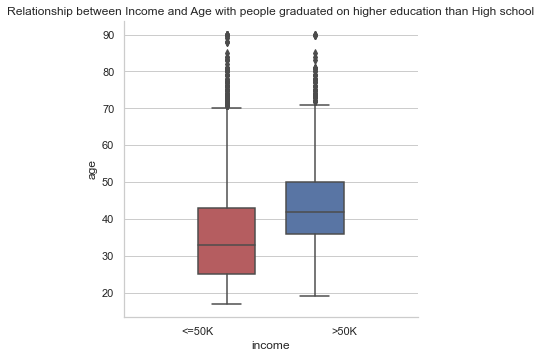

In [620]:



colors = {'<=50K': 'r', '>50K': 'b'}


sns.catplot(data=lowHS, x='income', y='age', kind='box', aspect=1, hue='income', palette=colors)
plt.title('Relationship between Income and Age with people graduated on High School or less')
plt.show()


sns.catplot(data=upHS, x='income', y='age', kind='box', aspect=1, hue='income', palette=colors, order=['<=50K', '>50K'])
plt.title('Relationship between Income and Age with people graduated on higher education than High school')
plt.show()


- With the charts above, we found that most of the people with an higher education level than a High School degree get younger more income than 50K. 
- No notable differences between people with High School degree or lower education level and people with higher education leve that have an income lower than 50K

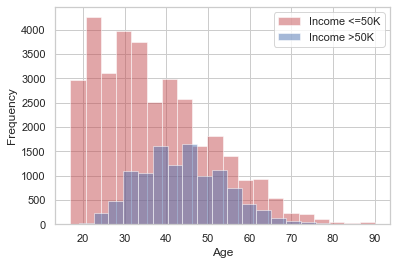

In [621]:
df_less_50k = df[df['income'] == '<=50K']
df_more_50k = df[df['income'] == '>50K']

fig, ax = plt.subplots()
ax.hist(df_less_50k['age'], color='r', alpha=0.5, bins=20, label='Income <=50K')
ax.hist(df_more_50k['age'], color='b', alpha=0.5, bins=20, label='Income >50K')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.legend(loc='upper right')
plt.show()

- We can see the tendence of young people to get an income lower than 50K and the actual difference of incomes on a young age

### - Does the educational level matters? 
### - How big are the differences between the income on different educational levels?


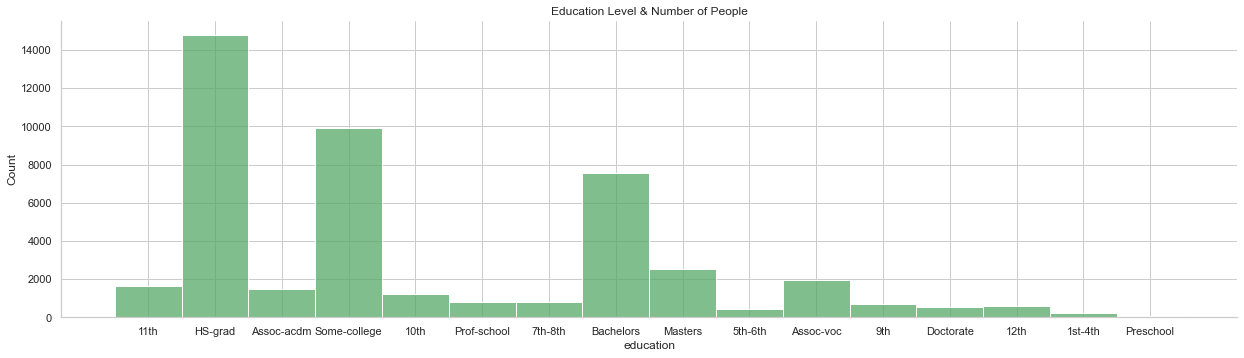

In [630]:
sns.displot(color= 'g', x= df['education'], aspect= 3.5)
plt.title('Education Level & Number of People')
plt.show()


Here three notable group of education levels between people with an income:
###### (note that the Dataset is just for people with a current income the dataset doesnt count people without a job).
- High School degree.
- Some-College degree.
- Bachelor degree.

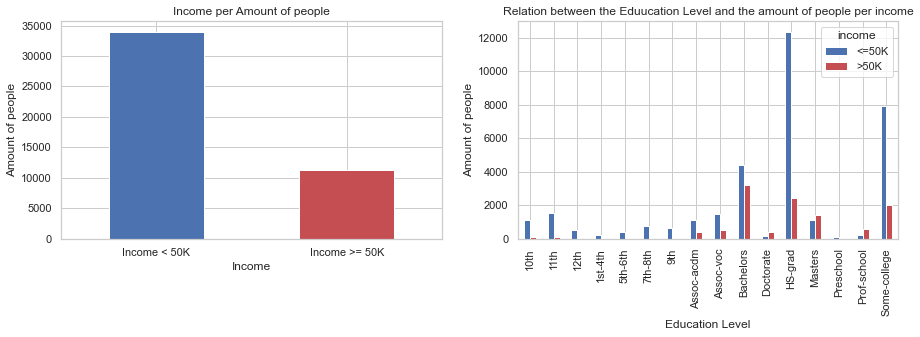

In [554]:
counts = df['income'].value_counts()

counts_by_other = df.groupby([df['education'], 'income']).size().unstack()

fig, ax = plt.subplots(1, 2, figsize=(15, 4))
counts.plot(kind='bar', ax=ax[0], color=['b', 'r'])
counts_by_other.plot(kind='bar', ax=ax[1], color=['b', 'r'])

ax[0].set_xlabel('Income')
ax[1].set_xlabel('Education Level')
ax[0].set_ylabel('Amount of people')
ax[1].set_ylabel('Amount of people')
ax[0].set_xticklabels(['Income < 50K', 'Income >= 50K'], rotation=0)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[0].set_title('Income per Amount of people')
ax[1].set_title('Relation between the Eduucation Level and the amount of people per income')

plt.show()

Difference of Incomes, here we can infer that is important to get at least a high school degree to get better jobs, however, make a College and stop there is not that good, people should keep studying and get a Bachelor Degree because with High School degree is less likely to get an income higher than 50K. 

#### - Does race matters? 
#### - On the 90's (1994), How spread out the income was for the different races?

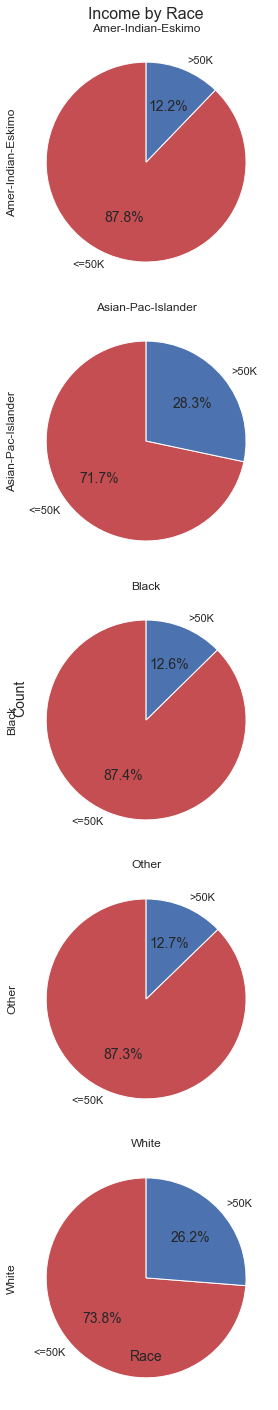

In [608]:
grouped = df.groupby(['race', 'income']).size()

pivot_table = grouped.unstack()

fig, axes = plt.subplots(nrows=pivot_table.shape[0], ncols=1, figsize=(4, 20))

colors = ['r', 'b']
for i, education_level in enumerate(pivot_table.index):
    row = pivot_table.loc[education_level]
    row.plot(kind='pie', ax=axes[i], colors=colors, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(education_level)

fig.suptitle('Income by Race', fontsize=16)
fig.text(0.5, 0.04, 'Race', ha='center')
fig.text(0.04, 0.5, 'Count', va='center', rotation='vertical')

fig.tight_layout()
plt.show()



There are no notable differences of income related to Race, with just little different percentage with the Asian-Pac-Islander race on incomes percentage

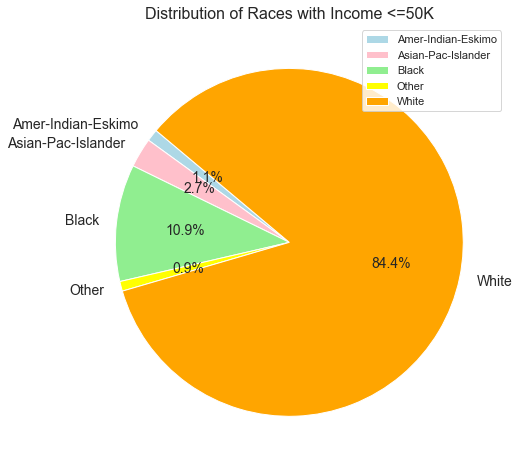

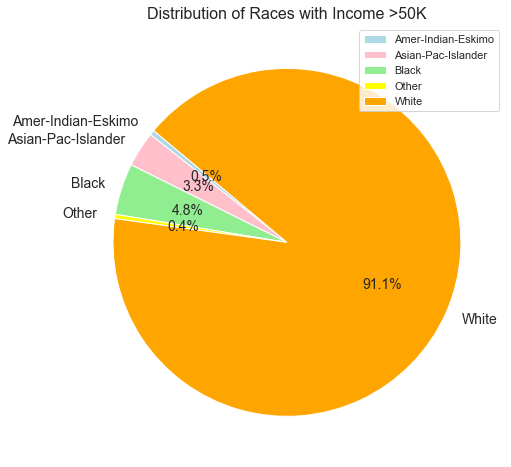

In [600]:
grouped = df[df['income'] == '<=50K'].groupby(['race']).size()

colors = ['lightblue', 'pink', 'lightgreen', 'yellow', 'orange', 'purple']
labels = grouped.index

fig, ax = plt.subplots(figsize=(8,8))
ax.pie(grouped, labels=labels, colors=colors, autopct='%1.1f%%', startangle=500, textprops={'fontsize': 14})

ax.set_title('Distribution of Races with Income <=50K', fontsize=16)
ax.legend(loc='best')




grouped = df[df['income'] == '>50K'].groupby(['race']).size()

colors = ['lightblue', 'pink', 'lightgreen', 'yellow', 'orange', 'purple']
labels = grouped.index

fig, ax = plt.subplots(figsize=(8,8))
ax.pie(grouped, labels=labels, colors=colors, autopct='%1.1f%%', startangle=500, textprops={'fontsize': 14})

ax.set_title('Distribution of Races with Income >50K', fontsize=16)
ax.legend(loc='best')

plt.show()

There is a high percentage of White race on the data, nonetheless, there are a higher percentage on White race and Asian-Pac-Islander with an income higher than 50K, with notable decreases of Black and Amer-Indian-Eskimo percentages between  an income lower than 50K and higher than 50K.

### - It is known that in the 90's (1994) the salary gap was important between genders, is this true? does it really matters?

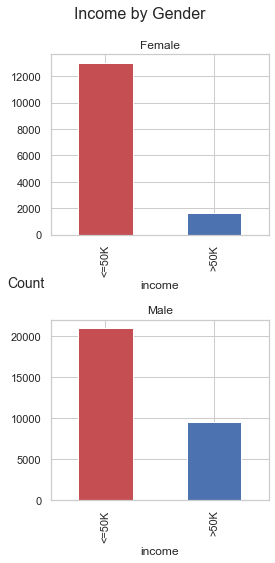

In [636]:

grouped = df.groupby(['gender', 'income']).size()

pivot_table = grouped.unstack()

fig, axes = plt.subplots(nrows=pivot_table.shape[0], ncols=1, figsize=(4, 8))

colors = ['r', 'b']
for i, (gender, row) in enumerate(pivot_table.iterrows()):
    row.plot(kind='bar', ax=axes[i], color=[colors[j] for j in range(len(row.index))])
    axes[i].set_title(gender)

fig.suptitle('Income by Gender', fontsize=16)

fig.text(0.04, 0.5, 'Count', va='center')

fig.tight_layout()


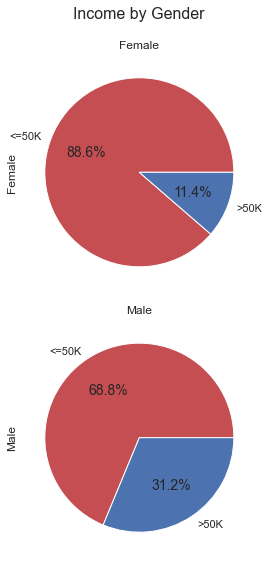

In [637]:
grouped = df.groupby(['gender', 'income']).size()

pivot_table = grouped.unstack()

fig, axes = plt.subplots(nrows=pivot_table.shape[0], ncols=1, figsize=(4, 8))

for i, (gender, row) in enumerate(pivot_table.iterrows()):
    row.plot(kind='pie', ax=axes[i], colors=colors, autopct='%1.1f%%')
    axes[i].set_title(gender)

fig.suptitle('Income by Gender', fontsize=16)

fig.tight_layout()


Differences between the percentages of income are notable by Gender, with a higher percentage of an income higher of 50K on the Male gender than Female gender, showing the wage gap of the time

## Conclusion:
After visualize the data and the different factors than can ifluence the anual income to be higher or lower than 50K we can conclude that on 1994, the **age** rate was the biggest factor of influence to get an income higher than 50K. However, we found also big influence on the **educational level**, being the bachelor's degree the educational level with the most income above 50k, the differences between **genders** were notable and could be the result of gender inequality at the time, while no evidence of **racial** differences in annual income was found.